<b>
<br>
<font size="5"><p style="text-align: center;">Introdução à Programação de Computadores</p></font>
<br>
<font size="5"><p style="text-align: center;">Atividade Interativa #10</p></font>
</b>
<br><br>
<font size="4"><b>Professores:</b>
<br>
Jefersson A. dos Santos - jefersson@dcc.ufmg.br
<br>
João Guilherme Maia de Menezes - jgmm@dcc.ufmg.br
<br><br>
</font>
<hr>
<br>
<font size="3">
</font>

# Estatísticas sobre gastos parlamentares 
------------------

# 1. Introdução

---------------

A Cota para o Exercício da Atividade Parlamentar – CEAP (antiga verba indenizatória) é uma cota única mensal destinada a custear os gastos dos deputados exclusivamente vinculados ao exercício da atividade parlamentar.

Nessa atividade prática você deverá implementar uma série de funções para geração de gráficos sobre os gastos parlamentares utilizando os dados publicamente disponíveis sobre as despesas do [CEAP](https://dadosabertos.camara.leg.br/swagger/api.html "Arquivos - Despesas pela Cota para Exercício da Atividade Parlamentar"). 


Você pode baixar os arquivos CSV do [site](https://dadosabertos.camara.leg.br/swagger/api.html) para a pasta **dados_parlamento** dentro do diretório onde se encontra o seu notebook (arquivo com extensão ipynb)

Não altere o nome dos arquivos:
* Ano-2009.csv
* Ano-2010.csv
* Ano-2011.csv
* Ano-2012.csv
* Ano-2013.csv
* Ano-2014.csv
* Ano-2015.csv
* Ano-2016.csv
* Ano-2017.csv

As suas funções para leitura dos arquivos devem utilizar caminhos relativos.<br>
Ou seja, para a leitura dos dados do arquivo Ano-2009.csv, por exemplo, o nome do arquivo passado para a função *open* deve ser "dados_parlamento/Ano-2009.csv". 

Não utilizar o caminho absoluto (por exemplo "C:\usuarios\m1011\documents\tp2\dados_parlamento\Ano-2009.csv") pois isso provavelmente impedirá que seu trabalho funcione em outra máquina além da sua.

# 2. O que deve ser feito
---------------

Para manipulação dos dados, você deverá implementar pelo menos (sendo permitida a implementação de outras funções, caso necessário):
<ol>
<li>Uma função para leitura dos dados. **Atenção:** (1) Observe que os dados estão codificados em formato UTF-8; (2) Observe que os arquivos são grandes. Talvez não seja uma boa ideia ler tudo e colocar em uma única lista. **FEITO!**</li>
<li>Uma função que retorna uma lista com os gastos totais da Câmara dos Deputados em um intervalo ('ano início' até 'ano fim').</li>
<li>Uma função que retorna uma lista com os gastos totais de todos os parlamentares em um ano específico.</li>
<li>Uma função que retorna os gastos médios totais dos parlamentares por partido para um ano específico.</li>
<li>Uma função que retorna os gastos médios totais dos parlamentares por estado para um ano específico.</li>
</ol>

As funções deverão ser utilizadas para plotar:
<ol>
<li>Um gráfico ilustrando a evolução dos gastos das cotas da Câmara dos Deputados entre 2009 e 2019.</li>
<li>Um histograma mostrando o total dos 20 parlamentares que mais gastaram em 2019.</li>
<li>Um histograma por partido, mostrando os gastos médios de seus parlamentares no ano de 2019.</li>
<li>Um histograma por estado, mostrando os gastos médios de seus parlamentares ano de 2019.</li>
</ol>

No final, você deverá utilizar os gráficos para responder as seguintes perguntas:
<ol>
<li>Houve alguma redução nos gastos com o CEAP nos últimos anos em que o país vive uma crise de arrecadação?</li>
<li>Quais os parlamentares mais caros no exercício de 2019?</li>
<li>Quais os partidos que, na média, mais "custam" para o Brasil em termos de auxílios a parlamentares?</li>
<li>Quais os estados, na média, mais "custam" para o Brasil em termos de auxílios a parlamentares? Pelas regras de liberação dos auxílios para viagem, o esperado é que os estados mais distantes do DF custem mais. </li>
</ol>




In [0]:
# Criando a pasta
!mkdir dados_parlamentares

# Baixando os dados de 2019
!wget http://www.camara.leg.br/cotas/Ano-2019.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2018.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2017.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2016.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2015.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2014.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2013.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2012.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2011.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2010.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2009.csv.zip

!unzip Ano-2019.csv.zip
!unzip Ano-2018.csv.zip
!unzip Ano-2017.csv.zip
!unzip Ano-2016.csv.zip
!unzip Ano-2015.csv.zip
!unzip Ano-2014.csv.zip
!unzip Ano-2013.csv.zip
!unzip Ano-2012.csv.zip
!unzip Ano-2011.csv.zip
!unzip Ano-2010.csv.zip
!unzip Ano-2009.csv.zip

!mv *.csv dados_parlamentares/


In [11]:
# 1 - Uma função para leitura dos dados:

# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo. 
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica. 
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    #file = open(filename, 'r', encoding='ISO-8859-1')
    file = open(filename, 'r', encoding='UTF-8')
    
    # Criando uma lista vazia para armazenar todos os dados do arquivo
    dados = []
    
    # Para cada linha do arquivo, realizamos as seguintes operacoes: 
    # (1) removemos o caractere '\n' do final da linha
    # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
    # (3) removemos as aspas extras
    # (4) transformamos a linha em uma lista
    # (5) adicionamos a lista de itens na lista 'dados'
    for line in file:
        dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
        
    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)
    
    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
# Apenas um teste. Fique a vontade para alterar ou apagar esse trecho de código.
rotulos, dados = le_dados("dados_parlamentares/Ano-2019.csv")

print (rotulos, "\n")
print ("Nome do parlamentar: ", dados[0][0])
print ("Número total de registros: %d\n" % (len(dados)))
print(dados[0])

['\ufefftxNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar', 'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota', 'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao', 'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento', 'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes', 'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote', 'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento', 'urlDocumento'] 

Nome do parlamentar:  AVANTE
Número total de registros: 224155

['AVANTE', '', '', '', '2019', 'NA', '', '56', '13', 'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR', '0', '', 'ANA CAROLINA MOURA ALVES 01136994173', '307.711.930/0014-5', '001329989', '0', '2019-06-06T00:00:00', '2100', '0', '2100', '6', '2019', '0', '', '', '1609131', '', '', '3175', '6862742', 'https://www.camara.leg.br/cota-parlamentar/documentos/publ/3175/2019/6862742.pdf']


In [0]:
## Bibliotecas utilizadas

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from operator import itemgetter

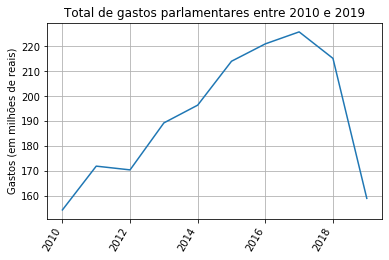

In [55]:
# Implemente o código das suas funções seus códigos aqui. 
# Fique livre para criar quantas células você achar necessário.

# 2 - Uma função que retorna uma lista com os gastos totais da Câmara dos Deputados em um intervalo ('ano início' até 'ano fim')

def gastos_totais_intervalo(ano_inicio, ano_fim):
    gastos = []
    for ano in range(ano_inicio, ano_fim + 1):
        gasto_total_ano = 0
        rotulos, dados = le_dados("dados_parlamentares/Ano-" + str(ano) + ".csv")

        # Iterar em cada registro de gasto
        # A informação do gasto está na coluna de rótulos identificada por 'vlrLiquido'
        index = rotulos.index('vlrLiquido')
        for registro in dados:            
            gasto_total_ano += float(registro[index])
        
        gastos.append((ano, gasto_total_ano))
    return gastos

## BLOCO PRINCIPAL DO PROGRAMA ##
#gastos_totais_intervalo(2010, 2019)

# Plota um gráfico com a série temporal dos gastos totais da Câmara dos Deputados
# Entrada: lista de tuplas (ano, gasto)
def plot_serie_gastos(lista):    
    x = []
    y = []
    
    for l in lista:
        x.append(l[0])
        y.append(l[1]/(10**6)) # Dividindo por 1 milhao para facilitar a representação

    fig, ax = plt.subplots()
    fig.autofmt_xdate()        
    
    plt.plot(x,y)    

    plt.ylabel('Gastos (em milhões de reais)')
    plt.xticks(rotation=60)
    plt.grid(True)
    ax.set_title('Total de gastos parlamentares entre 2010 e 2019')
    plt.show() 

############# BLOCO PRINCIPAL DO PROGRAMA #############    

plot_serie_gastos(gastos_totais_intervalo(2010, 2019))




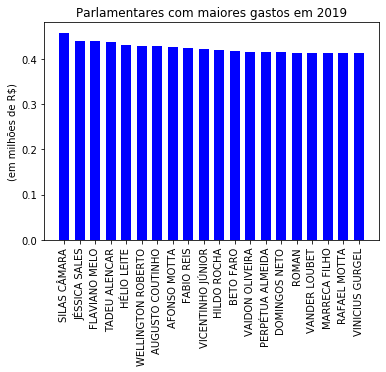

In [44]:
# 3 - Uma função que retorna uma lista com os gastos totais de todos os parlamentares em um ano específico

def gastos_totais_por_parlamentar(ano):
    gastos_dict = {}
    rotulos, dados = le_dados("dados_parlamentares/Ano-" + str(ano) + ".csv")

    # Iterar em cada registro de gasto
    # A informação do gasto está na coluna de rótulos identificada por 'vlrLiquido'
    index_id = rotulos.index('\ufefftxNomeParlamentar')
    index_gasto = rotulos.index('vlrLiquido')
    for registro in dados:   
        id_parlamentar = registro[index_id]      
        valor_gasto = float(registro[index_gasto])
        gastos_dict[id_parlamentar] = gastos_dict.get(id_parlamentar, 0.0) + valor_gasto
        
    gastos = []
    for parlamentar, gasto in gastos_dict.items():
        gastos.append((parlamentar, gasto))
    return gastos

# Plota um histograma dos 20 parlamentares com os maiores gastos em um dado ano
# Entrada: lista de tuplas (nome parlamentar, total gasto)
def plot_histogram(dados, ano):
    
    
    gastos_ordenados = sorted(dados, reverse=True, key=itemgetter(1))
    
    fig, ax = plt.subplots()

    valores = []
    nomes = []
    for k, v in gastos_ordenados[:20]:
        valores.append(float(v)/(10**6)) # Milhoes
        nomes.append(k)
    
    ind = np.arange(len(valores))  # the x locations for the groups
    width = 0.65       # the width of the bars        
    
    rects1 = ax.bar(ind, valores, width, color='b')
    
    ax.set_xticks(ind)
    ax.set_xticklabels(nomes)
    ax.set_title('Parlamentares com maiores gastos em ' + str(ano))

    plt.ylabel('(em milhões de R$)')
    plt.xticks(rotation=90)
    
    plt.show()

############# BLOCO PRINCIPAL DO PROGRAMA #############

plot_histogram(gastos_totais_por_parlamentar(2019), 2019)

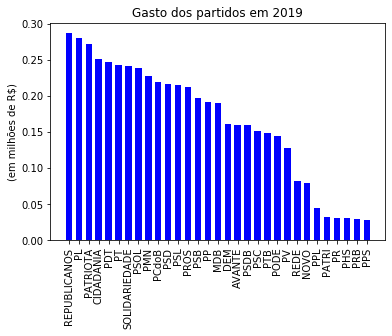

In [58]:
# 4 - Uma função que retorna os gastos médios totais dos parlamentares por partido para um ano específico.

def gastos_totais_por_partido(ano):
    gastos_partidos_dict = {}
    rotulos, dados = le_dados("dados_parlamentares/Ano-" + str(ano) + ".csv")

    # Iterar em cada registro de gasto
    index_partido = rotulos.index('sgPartido')
    index_id = rotulos.index('\ufefftxNomeParlamentar')
    index_gasto = rotulos.index('vlrLiquido')
    for registro in dados: 
        partido = registro[index_partido]
        id_parlamentar = registro[index_id]      
        valor_gasto = float(registro[index_gasto])
        
        if partido is not '':            
            gastos_parlamentares_dict = gastos_partidos_dict.get(partido, dict())
            gastos_parlamentares_dict[id_parlamentar] = gastos_parlamentares_dict.get(id_parlamentar, 0.0) + valor_gasto
            gastos_partidos_dict[partido] = gastos_parlamentares_dict         

    gastos = []
    for partido, dict_parlamentares in gastos_partidos_dict.items():
        media = sum(dict_parlamentares.values()) / len(dict_parlamentares)
        gastos.append((partido, media))
    return gastos

gastos_totais_por_partido(2019)

# Plota um histograma com o gasto dos partidos em um dado ano
# Entrada: lista de tuplas (partido, total gasto)
def plot_histogram_partidos(dados, ano):
    
    
    gastos_ordenados = sorted(dados, reverse=True, key=itemgetter(1))
    
    fig, ax = plt.subplots()

    valores = []
    nomes = []
    for k, v in gastos_ordenados:
        valores.append(float(v)/(10**6)) # Milhoes
        nomes.append(k)
    
    ind = np.arange(len(valores))  # the x locations for the groups
    width = 0.65       # the width of the bars        
    
    rects1 = ax.bar(ind, valores, width, color='b')
    
    ax.set_xticks(ind)
    ax.set_xticklabels(nomes)
    ax.set_title('Gasto dos partidos em ' + str(ano))

    plt.ylabel('(em milhões de R$)')
    plt.xticks(rotation=90)
    
    plt.show()

############# BLOCO PRINCIPAL DO PROGRAMA #############    

plot_histogram_partidos(gastos_totais_por_partido(2019), 2019)

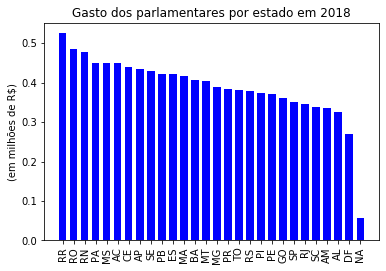

In [57]:
# 5 - Uma função que retorna os gastos médios totais dos parlamentares por estado para um ano específico.

def gastos_totais_por_estado(ano):
    gastos_estados_dict = {}
    rotulos, dados = le_dados("dados_parlamentares/Ano-" + str(ano) + ".csv")

    # Iterar em cada registro de gasto
    index_estado = rotulos.index('sgUF')
    index_id = rotulos.index('\ufefftxNomeParlamentar')
    index_gasto = rotulos.index('vlrLiquido')
    for registro in dados: 
        estado = registro[index_estado]
        id_parlamentar = registro[index_id]      
        valor_gasto = float(registro[index_gasto])
        
        if estado is not '':            
            gastos_parlamentares_dict = gastos_estados_dict.get(estado, dict())
            gastos_parlamentares_dict[id_parlamentar] = gastos_parlamentares_dict.get(id_parlamentar, 0.0) + valor_gasto
            gastos_estados_dict[estado] = gastos_parlamentares_dict         

    gastos = []
    for estado, dict_parlamentares in gastos_estados_dict.items():
        media = sum(dict_parlamentares.values()) / len(dict_parlamentares)
        gastos.append((estado, media))
    return gastos

# Plota um histograma com o gasto dos estados em um dado ano
# Entrada: lista de tuplas (estado, total gasto)
def plot_histogram_estados(dados, ano):
    
    gastos_ordenados = sorted(dados, reverse=True, key=itemgetter(1))
    
    fig, ax = plt.subplots()

    valores = []
    nomes = []
    for k, v in gastos_ordenados:
        valores.append(float(v)/(10**6)) # Milhoes
        nomes.append(k)
    
    ind = np.arange(len(valores))  # the x locations for the groups
    width = 0.65       # the width of the bars        
    
    rects1 = ax.bar(ind, valores, width, color='b')
    
    ax.set_xticks(ind)
    ax.set_xticklabels(nomes)
    ax.set_title('Gasto dos parlamentares por estado em ' + str(ano))

    plt.ylabel('(em milhões de R$)')
    plt.xticks(rotation=90)
    
    plt.show()

############# BLOCO PRINCIPAL DO PROGRAMA #############

plot_histogram_estados(gastos_totais_por_estado(2018), 2018)    